In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

### Tracking Refugees and Climate Anomalies

In [2]:
df_raw = pd.read_csv('temp_and_refugee.csv')
df_raw.head()

,Origin,Year,Residence,Refugees,Total Population,Value
0,Chad,1979,Cameroon,8000.0,8000,-0.12
1,Chad,1979,Sudan,1000.0,1000,-0.12
2,Chad,1980,Sudan,4000.0,4000,0.09
3,Chad,1980,Cameroon,110000.0,110000,0.09
4,Chad,1981,Nigeria,84570.0,100000,-0.41


In [6]:
df = df_raw.dropna()
df.describe()

,Year,Refugees,Value
count,906.000000,906.000000,906.000000
mean,2005.557395,3777.260486,0.296391
std,8.774745,38753.930073,0.381907
min,1975.000000,1.000000,-1.160000
25%,2000.000000,2.000000,0.060000
50%,2007.000000,12.500000,0.320000
75%,2013.000000,93.000000,0.530000
max,2018.000000,786000.000000,1.440000


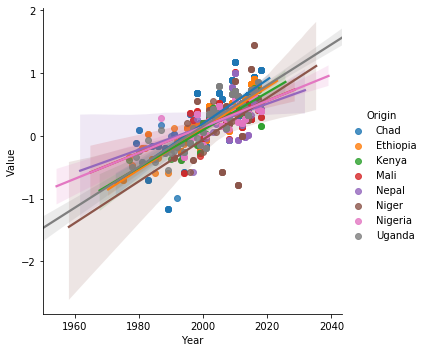

In [7]:
sns.lmplot('Year', 'Value', data=df, hue='Origin', fit_reg=True)

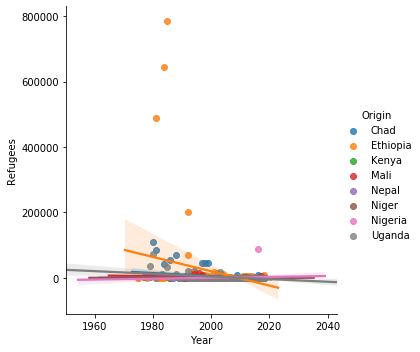

In [21]:
sns.lmplot('Year', 'Refugees', data=df, hue='Origin', fit_reg=True)

In [19]:
grouped = df.groupby('Year').mean()
grouped.head(n=10)

,Refugees,Value
Year,,
1975,205.000000,-0.710000
1977,1010.000000,-0.360000
1978,2075.000000,-0.480000
1979,14666.666667,-0.193333
1980,62333.333333,-0.020000
1981,143357.500000,-0.302500
1982,60.000000,-0.200000
1983,3283.333333,-0.356667
1984,138550.000000,-0.290000


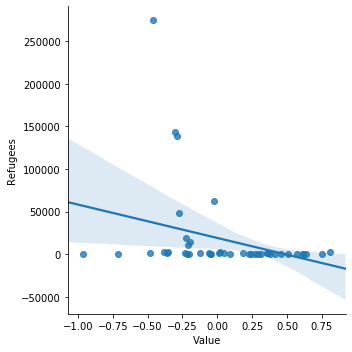

In [20]:
sns.lmplot('Value', 'Refugees', data=grouped, fit_reg=True)

In [44]:
df_all_raw = pd.read_csv('all.csv')
df_all_raw.head()

,Origin,Year,Residence,Refugees,Total Population,Value
0,Algeria,1980,Italy,2.0,2,-0.58
1,Algeria,1981,Italy,3.0,3,-0.43
2,Algeria,1982,Italy,3.0,3,-1.10
3,Algeria,1983,Italy,3.0,3,-0.13
4,Algeria,1984,Italy,3.0,3,-1.10


In [45]:
df_all = df_all_raw.dropna()
df_all.describe()

,Year,Refugees,Total Population,Value
count,23086.000000,2.308600e+04,2.308600e+04,23086.000000
mean,2005.927705,4.622833e+03,5.217090e+03,0.327939
std,9.000408,3.995991e+04,4.368142e+04,0.410760
min,1960.000000,1.000000e+00,1.000000e+00,-1.690000
25%,2001.000000,3.000000e+00,4.000000e+00,0.090000
50%,2007.000000,1.300000e+01,2.200000e+01,0.330000
75%,2013.000000,1.260000e+02,2.040000e+02,0.560000
max,2018.000000,2.000000e+06,2.000000e+06,2.180000


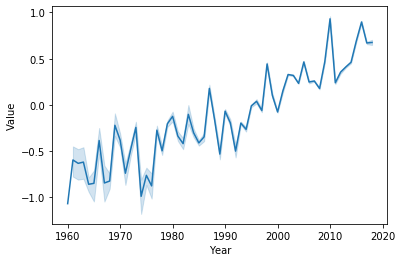

In [58]:
sns.lineplot('Year', 'Value', data=df_all)

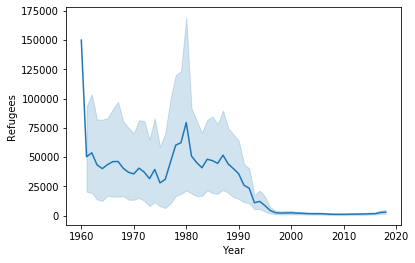

In [59]:
sns.lineplot('Year', 'Refugees', data=df_all)

In [49]:
grouped_all_year = df_all.groupby('Year').mean()
grouped_all_year.head(n=10)

,Refugees,Total Population,Value
Year,,,
1960,150000.000000,150000.000000,-1.070000
1961,50333.333333,50333.333333,-0.596667
1962,53666.666667,53666.666667,-0.633333
1963,43375.000000,43375.000000,-0.620000
1964,40160.000000,40160.000000,-0.860000
1965,43587.272727,44296.363636,-0.850000
1966,46117.692308,46633.076923,-0.386154
1967,46286.666667,46286.666667,-0.846000
1968,40441.904762,40557.619048,-0.825238


In [51]:
grouped_all_origin = df_all.groupby('Origin').mean()
grouped_all_origin.head(n=10)

,Year,Refugees,Total Population,Value
Origin,,,,
Algeria,2006.346383,154.275745,205.024681,0.405311
Angola,2003.724907,13177.798513,14109.204461,0.119316
Cameroon,2007.998418,186.915348,270.318038,0.377358
Chad,2005.088435,2812.437925,3323.892857,0.354362
Djibouti,2007.255132,246.730205,266.475073,0.341261
Eritrea,2008.820660,6464.279770,7060.040172,0.460165
Ethiopia,2004.567243,11434.490874,12307.643612,0.282570
Ghana,2005.424951,458.987329,534.606238,0.194903
Jordan,2007.423077,50.397878,80.681698,0.587706


In [81]:
chad_df = df_all.loc[(df_all['Origin'] == 'Chad')]
chad_df.head()

,Origin,Year,Residence,Refugees,Total Population,Value
4604,Chad,1970,Central African Rep.,1400.0,1400,-0.70
4605,Chad,1970,Sudan,500.0,500,-0.70
4606,Chad,1971,Central African Rep.,1400.0,1400,-0.73
4607,Chad,1972,Central African Rep.,1500.0,1500,-0.20
4608,Chad,1973,Central African Rep.,1500.0,1500,-0.18


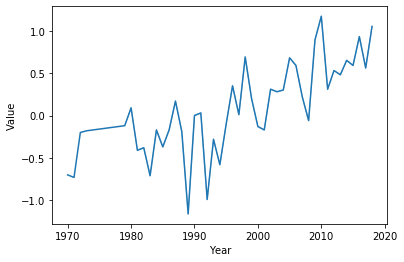

In [82]:
sns.lineplot('Year', 'Value', data=chad_df)

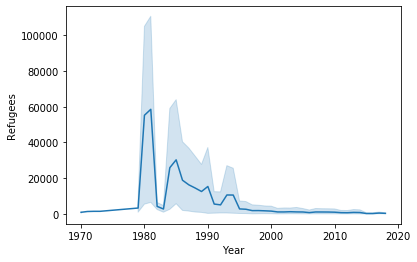

In [83]:
sns.lineplot('Year', 'Refugees', data=chad_df)

In [86]:
chad_res_df = df_all.loc[(df_all['Residence'] == 'Chad')]
chad_res_df.head()

,Origin,Year,Residence,Refugees,Total Population,Value
1271,Algeria,2016,Chad,2.0,2,1.03
1793,Angola,2000,Chad,1.0,1,0.02
3229,Cameroon,2001,Chad,15.0,16,-0.02
3282,Cameroon,2002,Chad,23.0,44,0.25
3904,Cameroon,2010,Chad,5.0,14,0.81


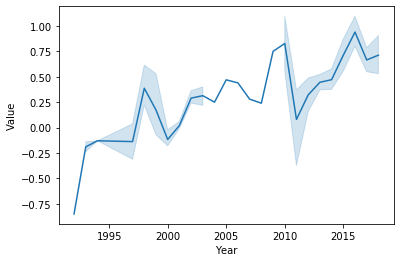

In [89]:
## average anomoly values for countries where chad refugees are coming from
sns.lineplot('Year', 'Value', data=chad_res_df)

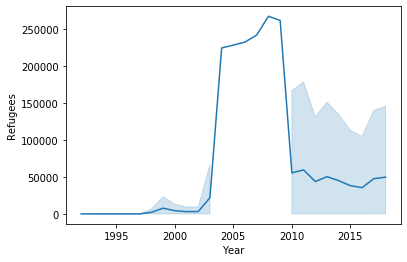

In [90]:
sns.lineplot('Year', 'Refugees', data=chad_res_df)